In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
import imageio

### Create a numpy array from an image file

In [8]:
from skimage import data
photo_data = imageio.imread('631_crop_chip1.jpg')
type(photo_data)

imageio.core.util.Image

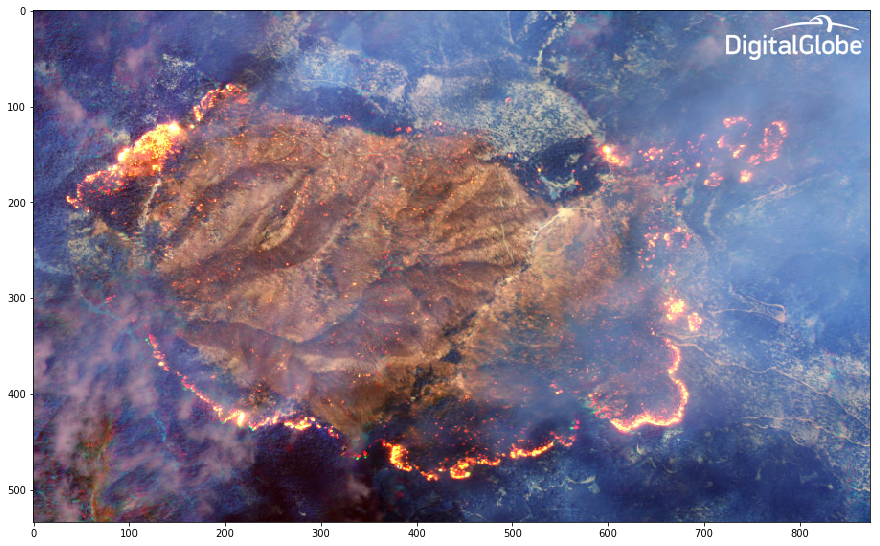

In [9]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [10]:
photo_data.shape

(534, 874, 3)

In [12]:
photo_data.size // 1024

1367

In [14]:
photo_data.max()
photo_data.min()

0

In [15]:
photo_data.mean()

117.915041124224

In [20]:
low_value_filter = photo_data < 50
low_value_filter.shape

(534, 874, 3)

### Filtering out low values
Whenever the low value filter is True, set value to 0

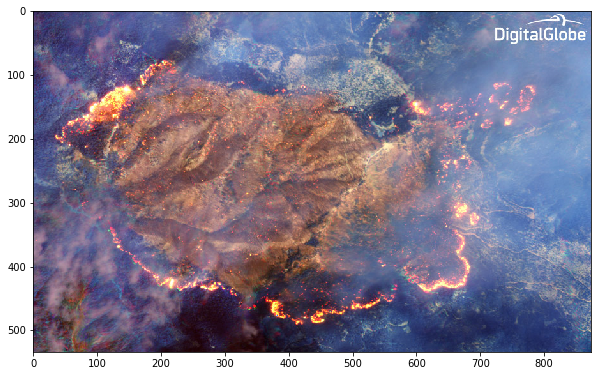

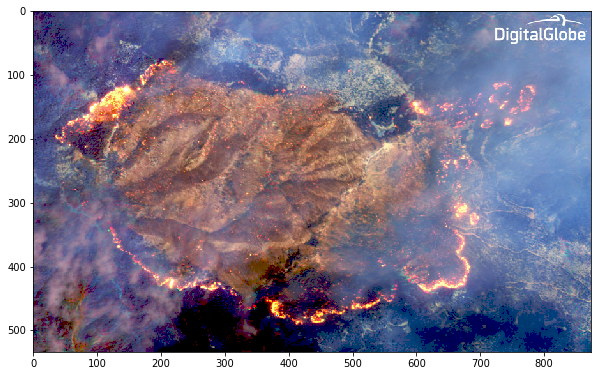

In [21]:
import random
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

### Create a circle in the middle of the image

In [23]:
total_rows, total_cols, total_layers = photo_data.shape
X, Y = np.ogrid[:total_rows,:total_cols]

In [25]:
center_row, center_col = total_rows / 2, total_cols / 2
# print(X-center_row)
# print(Y-center_col)
dist_from_center = (X-center_row)**2 + (Y-center_col)**2
radius = (total_rows / 2)**2
circular_mask = (dist_from_center > radius)

In [26]:
photo_circled = photo_data

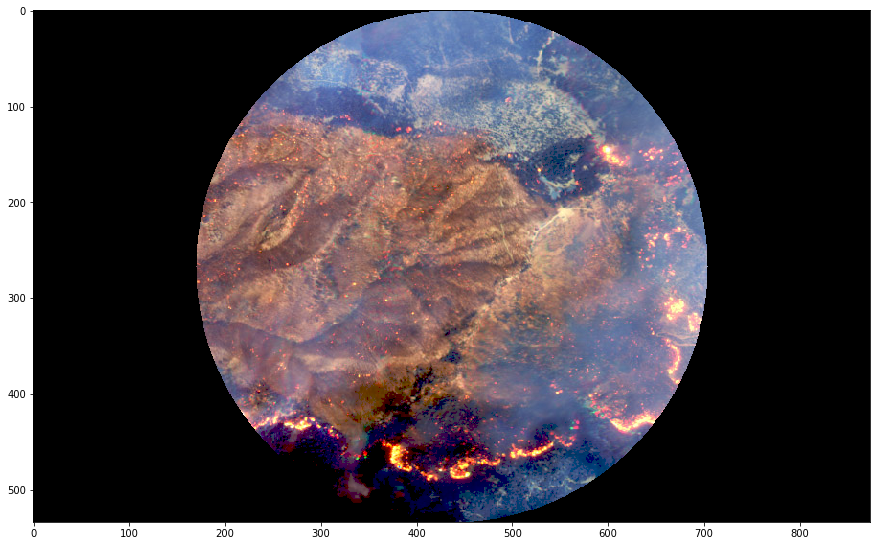

In [27]:
photo_circled[circular_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_circled)

### Processing of red pixels

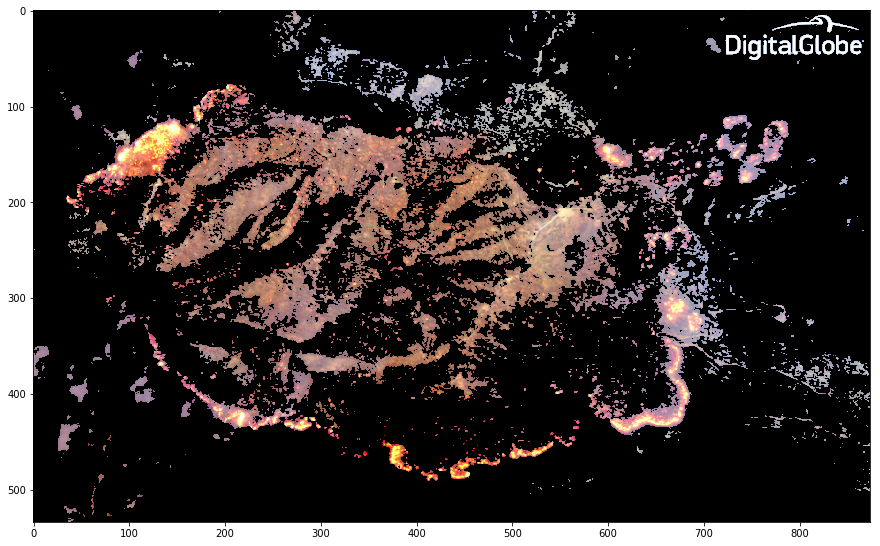

In [29]:
photo_data = imageio.imread('631_crop_chip1.jpg')
red_mask = photo_data[:,:,0]<150
red_data = photo_data
red_data[red_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(red_data)

### Detecting green pixels

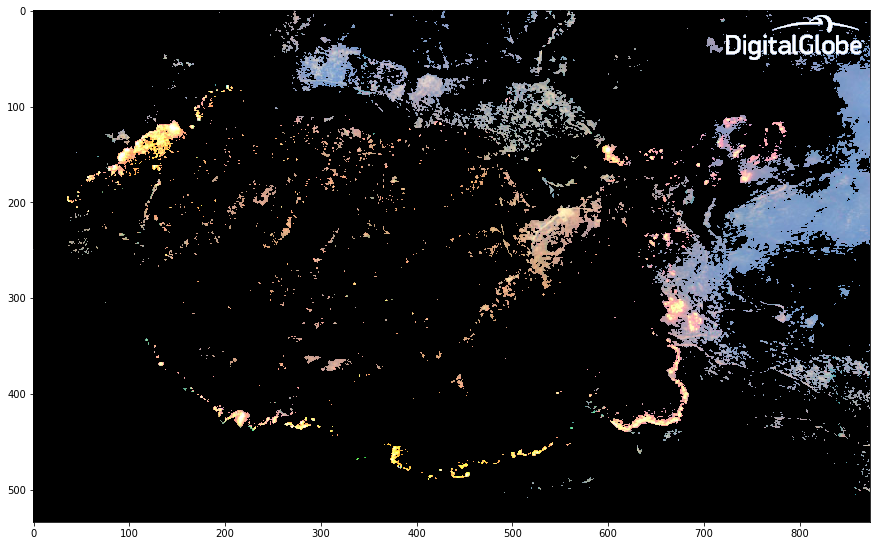

In [31]:
photo_data = imageio.imread('631_crop_chip1.jpg')
green_mask = photo_data[:,:,1]<150
photo_data[green_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

### Detecting high blue pixels

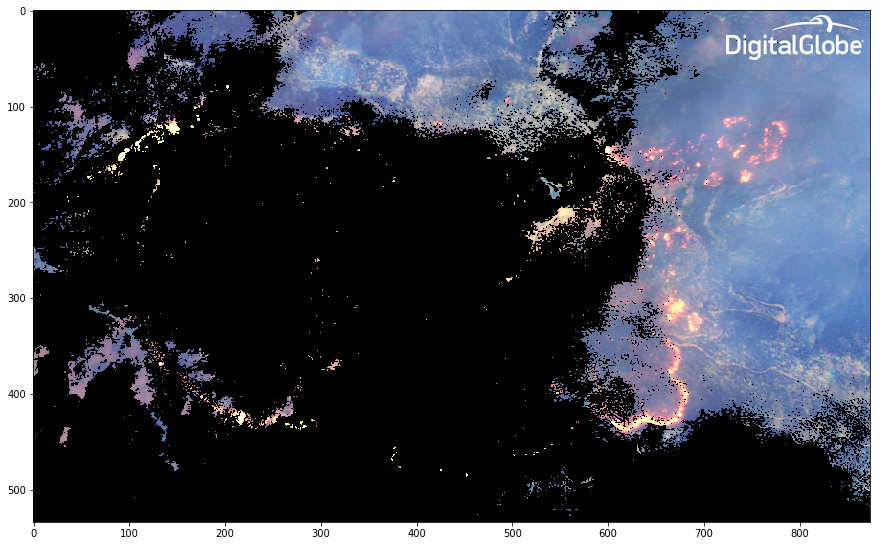

In [33]:
photo_data = imageio.imread('631_crop_chip1.jpg')
blue_mask = photo_data[:,:,2]<150
photo_data[blue_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

### Composite mask

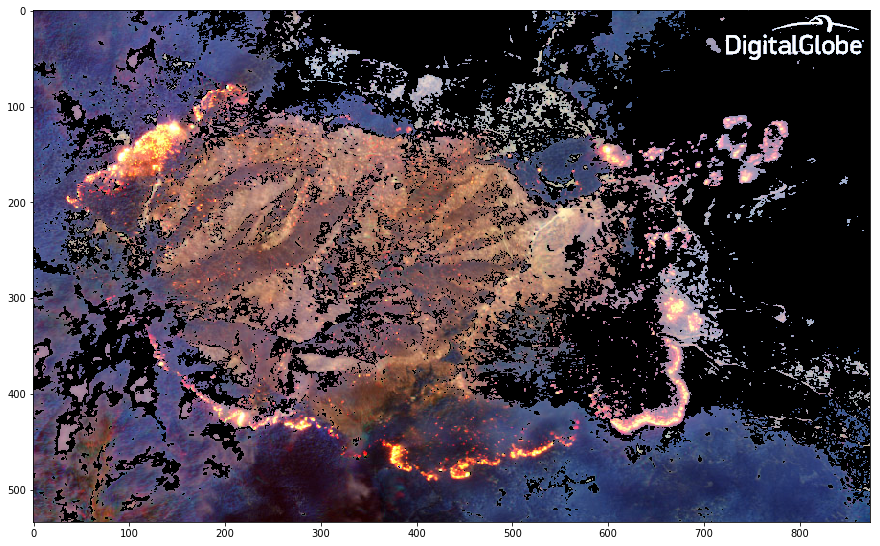

In [35]:
photo_data = imageio.imread('631_crop_chip1.jpg')

red =  photo_data[:,:,0] < 150
green =  photo_data[:,:,1] > 100
blue =  photo_data[:,:,2] < 100

composite_mask = np.logical_and(red, green, blue)
photo_data[composite_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)